In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
car_evaluation = fetch_ucirepo(id=19) 
  
# data (as pandas dataframes) 
X = car_evaluation.data.features 
y = car_evaluation.data.targets 
  
# metadata 
print(car_evaluation.metadata) 
  
# variable information 
print(car_evaluation.variables) 


{'uci_id': 19, 'name': 'Car Evaluation', 'repository_url': 'https://archive.ics.uci.edu/dataset/19/car+evaluation', 'data_url': 'https://archive.ics.uci.edu/static/public/19/data.csv', 'abstract': 'Derived from simple hierarchical decision model, this database may be useful for testing constructive induction and structure discovery methods.', 'area': 'Other', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1728, 'num_features': 6, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1988, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5JP48', 'creators': ['Marko Bohanec'], 'intro_paper': {'ID': 249, 'type': 'NATIVE', 'title': 'Knowledge acquisition and explanation for multi-attribute decision making', 'authors': 'M. Bohanec, V. Rajkovič', 'venue': '8th Intl Workshop on Expert Systems and their Applications, 

In [4]:
# estrazione delle feature (X) e del target (y)
X_df = car_evaluation.data.features
y_df = car_evaluation.data.targets

In [5]:
X_df.head()

,buying,maint,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med


In [6]:
y_df.head()

,class
0,unacc
1,unacc
2,unacc
3,unacc
4,unacc


In [7]:
# definizione dell'ordine per l'Ordinal Encoding
categories_map = [
    ['low', 'med', 'high', 'vhigh'],     # buying
    ['low', 'med', 'high', 'vhigh'],     # maint
    ['2', '3', '4', '5more'],           # doors
    ['2', '4', 'more'],                 # persons
    ['small', 'med', 'big'],            # lug_boot
    ['low', 'med', 'high']              # safety
]

In [8]:
# inizializzazione e applicazione dell'Ordinal Encoder
encoder_X = OrdinalEncoder(categories=categories_map)
X_encoded = encoder_X.fit_transform(X_df)

# conversione di nuovo in DataFrame per chiarezza e per i passaggi successivi
X_encoded_df = pd.DataFrame(X_encoded, columns=X_df.columns)

In [9]:
# inizializzazione e applicazione del Label Encoder sul target y
encoder_y = LabelEncoder()
y_encoded = encoder_y.fit_transform(y_df.iloc[:, 0])

# mappa per ricordare la corrispondenza classi-numeri
class_mapping = dict(zip(encoder_y.classes_, encoder_y.transform(encoder_y.classes_)))
# risultato: {'acc': 0, 'good': 1, 'unacc': 2, 'vgood': 3} (l'ordine dipende dall'alfabeto)

In [10]:
# suddivisione del dataset (80% Training, 20% Test)
# viene utilizzato 'stratify=y_encoded' per garantire che le proporzioni delle classi siano mantenute
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded_df,
    y_encoded,
    test_size=0.2,
    random_state=42,  # Fisso per riproducibilità
    stratify=y_encoded
)

print(f"Dimensione X_train: {X_train.shape}")
print(f"Dimensione X_test: {X_test.shape}")

Dimensione X_train: (1382, 6)
Dimensione X_test: (346, 6)


In [11]:
# standardizzazione
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Dati scalati correttamente (X_train_scaled, X_test_scaled).")

Dati scalati correttamente (X_train_scaled, X_test_scaled).


In [12]:
# preparazione all'implementazione della PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
# standardizzazione dei dati, causa sensibilità della scala della PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded_df)

# applicazione della PCA
# calcolo della PCA su tutte le 6 componenti per vedere la varianza spiegata
pca = PCA(n_components=6)
pca.fit(X_scaled)

# varianza spiegata per ciascuna componente principale
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

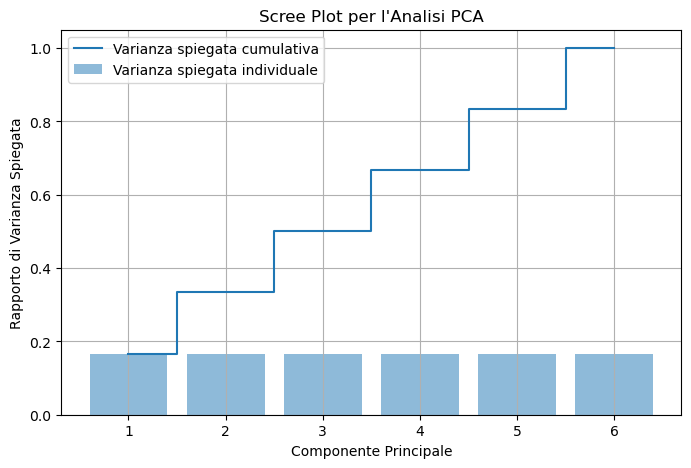

In [14]:
# creazione dello Scree Plot
plt.figure(figsize=(8, 5))
plt.bar(range(1, 7), explained_variance, alpha=0.5, align='center',
        label='Varianza spiegata individuale')
plt.step(range(1, 7), cumulative_variance, where='mid',
         label='Varianza spiegata cumulativa')
plt.ylabel('Rapporto di Varianza Spiegata')
plt.xlabel('Componente Principale')
plt.title('Scree Plot per l\'Analisi PCA')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [15]:
# preparazione implementazioni dei 3 classificatori scelti
#importazione delle librerie necessarie
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    roc_auc_score, 
    roc_curve, 
    auc
)
from sklearn.preprocessing import label_binarize

--- 1. Decision Tree ---

Report di Classificazione (Decision Tree):
              precision    recall  f1-score   support

         acc       0.97      0.99      0.98        77
        good       0.93      1.00      0.97        14
       unacc       1.00      1.00      1.00       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.99       346
   macro avg       0.98      0.98      0.98       346
weighted avg       0.99      0.99      0.99       346

ROC AUC Score (Decision Tree): 0.9869

Visualizzazione Matrice di Confusione (Decision Tree)...


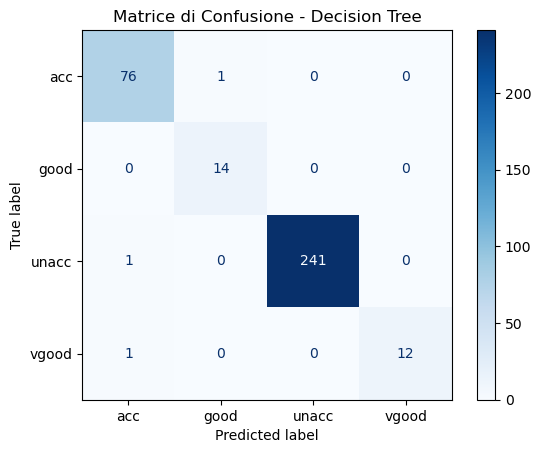

In [16]:
# implementazione del 1' classificatore scelto: Decision Tree
from sklearn.tree import DecisionTreeClassifier

print("--- 1. Decision Tree ---")

# --- Task 2: Addestramento ---
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# --- Predizioni ---
y_pred_dt = dt_model.predict(X_test_scaled)
y_proba_dt = dt_model.predict_proba(X_test_scaled)

# --- Task 3: Metriche ---
print("\nReport di Classificazione (Decision Tree):")
print(classification_report(y_test, y_pred_dt, target_names=encoder_y.classes_))

roc_auc_dt = roc_auc_score(y_test, y_proba_dt, multi_class='ovr')
print(f"ROC AUC Score (Decision Tree): {roc_auc_dt:.4f}")

# --- Task 4: Matrice di Confusione ---
print("\nVisualizzazione Matrice di Confusione (Decision Tree)...")
cm_dt = confusion_matrix(y_test, y_pred_dt)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=encoder_y.classes_)

disp_dt.plot(cmap=plt.cm.Blues)
plt.title("Matrice di Confusione - Decision Tree")
plt.show()

--- 2. Support Vector Machine (SVM) ---

Report di Classificazione (SVM):
              precision    recall  f1-score   support

         acc       0.91      0.97      0.94        77
        good       1.00      0.93      0.96        14
       unacc       0.99      0.98      0.99       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.97       346
   macro avg       0.98      0.95      0.96       346
weighted avg       0.98      0.97      0.97       346

ROC AUC Score (SVM): 0.9985

Visualizzazione Matrice di Confusione (SVM)...


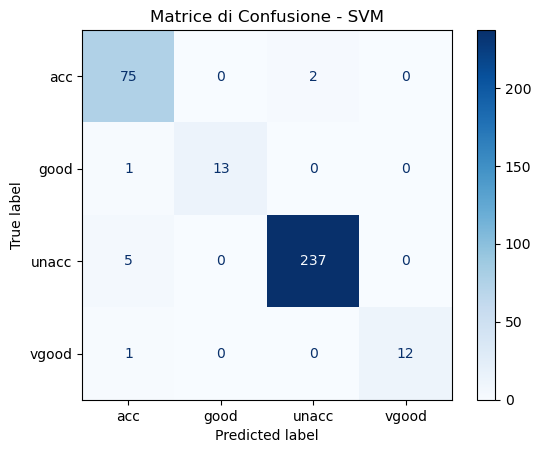

In [17]:
# implementazione 2' classificatore scelto: Support Vector Machine
from sklearn.svm import SVC

print("--- 2. Support Vector Machine (SVM) ---")

# --- Task 2: Addestramento ---
# probability=True è obbligatorio per calcolare y_proba
svm_model = SVC(probability=True, random_state=42) 
svm_model.fit(X_train_scaled, y_train)

# --- Predizioni ---
y_pred_svm = svm_model.predict(X_test_scaled)
y_proba_svm = svm_model.predict_proba(X_test_scaled)

# --- Task 3: Metriche ---
print("\nReport di Classificazione (SVM):")
print(classification_report(y_test, y_pred_svm, target_names=encoder_y.classes_))

roc_auc_svm = roc_auc_score(y_test, y_proba_svm, multi_class='ovr')
print(f"ROC AUC Score (SVM): {roc_auc_svm:.4f}")

# --- Task 4: Matrice di Confusione ---
print("\nVisualizzazione Matrice di Confusione (SVM)...")
cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=encoder_y.classes_)

disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Matrice di Confusione - SVM")
plt.show()

--- 3. Random Forest ---

Report di Classificazione (Random Forest):
              precision    recall  f1-score   support

         acc       0.97      1.00      0.99        77
        good       1.00      1.00      1.00        14
       unacc       1.00      1.00      1.00       242
       vgood       1.00      0.92      0.96        13

    accuracy                           0.99       346
   macro avg       0.99      0.98      0.99       346
weighted avg       0.99      0.99      0.99       346

ROC AUC Score (Random Forest): 0.9998

Visualizzazione Matrice di Confusione (Random Forest)...


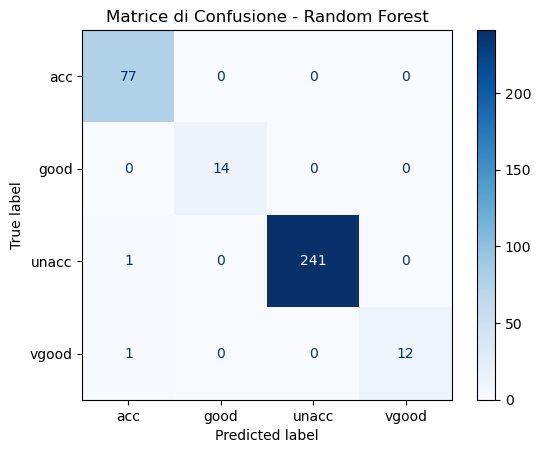

In [18]:
# implementazione 3' classificatore scelto: Random Forest
from sklearn.ensemble import RandomForestClassifier

print("--- 3. Random Forest ---")

# --- Task 2: Addestramento ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# --- Predizioni ---
y_pred_rf = rf_model.predict(X_test_scaled)
y_proba_rf = rf_model.predict_proba(X_test_scaled)

# --- Task 3: Metriche ---
print("\nReport di Classificazione (Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=encoder_y.classes_))

roc_auc_rf = roc_auc_score(y_test, y_proba_rf, multi_class='ovr')
print(f"ROC AUC Score (Random Forest): {roc_auc_rf:.4f}")

# --- Task 4: Matrice di Confusione ---
print("\nVisualizzazione Matrice di Confusione (Random Forest)...")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=encoder_y.classes_)

disp_rf.plot(cmap=plt.cm.Blues)
plt.title("Matrice di Confusione - Random Forest")
plt.show()

--- 4. Visualizzazione Curve ROC (Confronto) ---


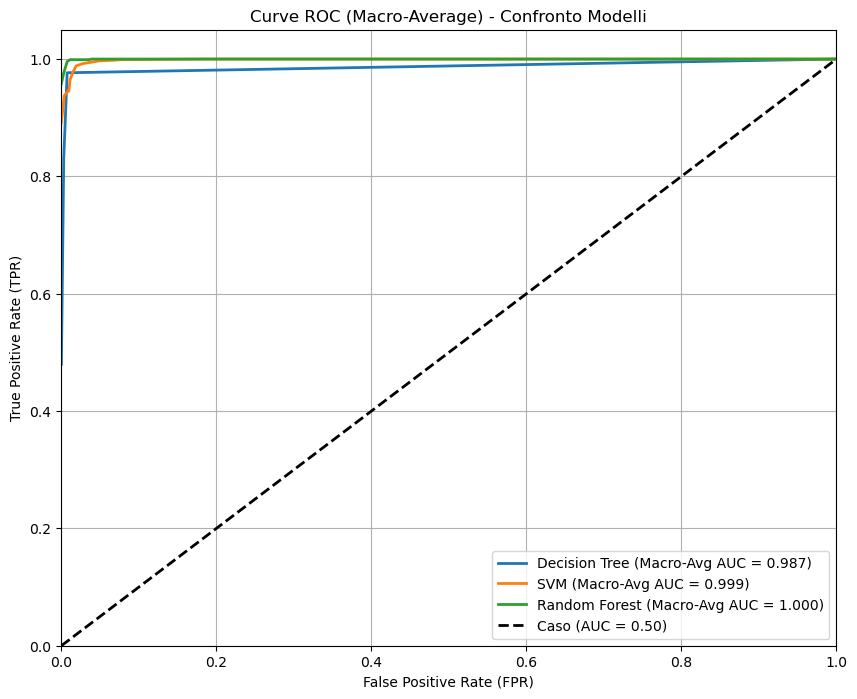

Confronto ROC completato.


In [19]:
# confronto dell curve ROC
print("--- 4. Visualizzazione Curve ROC (Confronto) ---")

# --- Preparazione Dati per ROC Multi-Classe ---
# Binarizza le etichette y_test (formato One-vs-Rest)
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]

# Mappa dei modelli, probabilità e AUC calcolate
models_data = {
    'Decision Tree': (y_proba_dt, roc_auc_dt),
    'SVM': (y_proba_svm, roc_auc_svm),
    'Random Forest': (y_proba_rf, roc_auc_rf)
}

plt.figure(figsize=(10, 8))

# --- Calcolo e Plot per ogni modello ---
for model_name, (proba, auc_score) in models_data.items():
    
    # Calcola la ROC "macro-average"
    fpr = dict()
    tpr = dict()
    roc_auc_macro = dict()
    
    # 1. Calcola la ROC per ogni classe
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], proba[:, i])
        
    # 2. Aggrega tutti i tassi di falsi positivi
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # 3. Interpola tutte le curve ROC
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # 4. Media finale
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc_macro["macro"] = auc(fpr["macro"], tpr["macro"]) # Questo ricalcola l'AUC macro

    # 5. Plotta la curva ROC macro-average
    # Usiamo l'auc_score calcolato in precedenza (multi_class='ovr') per l'etichetta
    plt.plot(fpr["macro"], tpr["macro"],
             label=f'{model_name} (Macro-Avg AUC = {auc_score:.3f})',
             linestyle='-', linewidth=2)

# --- Plot Finale ---
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Caso (AUC = 0.50)') # Linea casuale
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Curve ROC (Macro-Average) - Confronto Modelli')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print("Confronto ROC completato.")

--- 5. Task 5.a: Implementazione Deep Learning (MLP) ---
Inizio addestramento Rete Neurale (MLP)...
Addestramento completato.

Report di Classificazione (MLP):
              precision    recall  f1-score   support

         acc       0.97      0.99      0.98        77
        good       0.93      1.00      0.97        14
       unacc       1.00      0.99      1.00       242
       vgood       1.00      1.00      1.00        13

    accuracy                           0.99       346
   macro avg       0.98      0.99      0.99       346
weighted avg       0.99      0.99      0.99       346

ROC AUC Score (MLP): 0.9998

Visualizzazione Matrice di Confusione (MLP)...


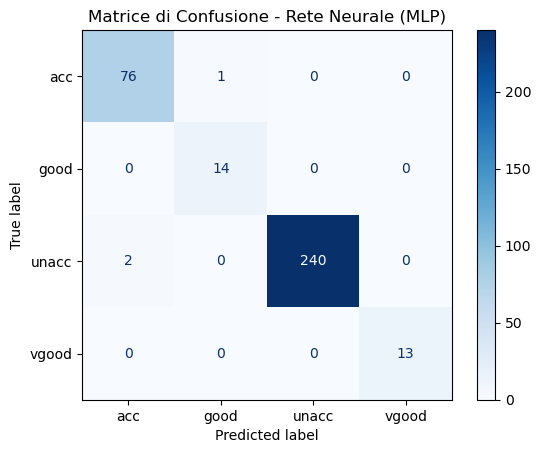

Implementazione Deep Learning completata.


In [20]:
# implementazione rete neurale (MLP)
from sklearn.neural_network import MLPClassifier

print("--- 5. Task 5.a: Implementazione Deep Learning (MLP) ---")

# --- Task 2 (per MLP): Addestramento ---
# Definiamo una rete neurale semplice:
# Due strati nascosti (hidden layers), uno da 100 neuroni, uno da 50.
# max_iter=500 per dare alla rete il tempo di convergere.
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)

print("Inizio addestramento Rete Neurale (MLP)...")
mlp_model.fit(X_train_scaled, y_train)
print("Addestramento completato.")

# --- Predizioni ---
y_pred_mlp = mlp_model.predict(X_test_scaled)
y_proba_mlp = mlp_model.predict_proba(X_test_scaled)

# --- Task 3 (per MLP): Metriche ---
print("\nReport di Classificazione (MLP):")
print(classification_report(y_test, y_pred_mlp, target_names=encoder_y.classes_))

roc_auc_mlp = roc_auc_score(y_test, y_proba_mlp, multi_class='ovr')
print(f"ROC AUC Score (MLP): {roc_auc_mlp:.4f}")

# --- Task 4 (per MLP): Matrice di Confusione ---
print("\nVisualizzazione Matrice di Confusione (MLP)...")
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
disp_mlp = ConfusionMatrixDisplay(confusion_matrix=cm_mlp, display_labels=encoder_y.classes_)

disp_mlp.plot(cmap=plt.cm.Blues)
plt.title("Matrice di Confusione - Rete Neurale (MLP)")
plt.show()

print("Implementazione Deep Learning completata.")